# Mapa de Puntos
Gráfico que muestra en un espacio geográfico la distribución de puntos de interés. Su objetivo es mostrar como se distribuyen mis entidades de interés (estaciones, casos médicos, edificios, etc) a lo largo de un espacio geográfico (mapa). Para poder graficarlo necesito la posición geográfica de cada punto.     

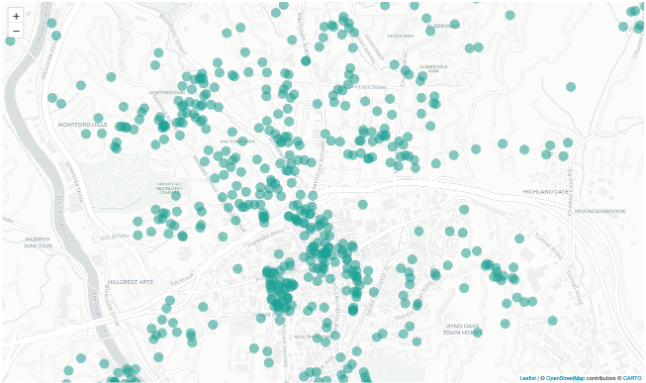


### Que necesito para hacer un Mapa de Puntos?
- Necesito un archivo en donde mis registros tengan coordenadas geográficas en cualquier formato. 

### Consejos
- Puedo introducir una o más variable al gráfico con las siguientes técticas:
  - Diferentes formas en los "puntos" para introducir una variable categórica. 
  - Convertir los puntos en burbujas de diferentes tamaños para introducir una variable numérica. Esto es un **Mapa de Burbujas**.
  - Jugar con la intensidad del color de cada punto para introducir una variable numérica.
- Si conecto los puntos con líneas por alguna relación que estos tengan, o por algún movimiento, se convierte en un Mapa de Conecciones o Flujo
- Si tengo una alta densidad de puntos, y empiezo a ver solo manchas, puedo considerar utilizar un HeatMap Geográfico, o hacer agrupación de puntos.

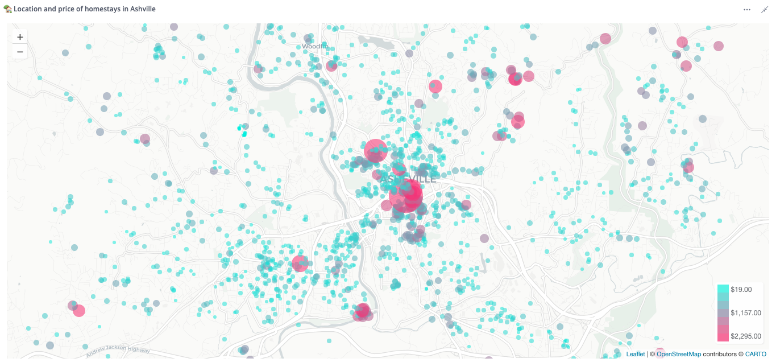

## En esta clase
### Datos
Información sobre las estaciones de Metros en madrid
### Objetivos
1. Encontrar como estan distribuidas las estaciones de metro a lo largo de madrid

## Referencias
- https://datavizcatalogue.com/ES/metodos/mapa_de_puntos.html
- https://datavizcatalogue.com/ES/metodos/mapa_de_burbujas.html

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly

In [4]:
# Leemos los datos con Pandas
#El dataset muestra datos de las entradas a las estaciones de metro de Madrid
df = pd.read_csv('./estaciones.csv',index_col = 'OBJECTID')
df

latitude  longitude  altitude geometry IDESTACION  FECHAACTUAL  \
OBJECTID                                                                    
1         40.424842  -3.707419       NaN    Point       4_38     20150709   
2         40.411472  -3.661785       NaN    Point      4_175     20150709   
3         40.441975  -3.701328       NaN    Point        4_7     20150709   
4         40.394808  -3.768128       NaN    Point      4_102     20150709   
5         40.387097  -3.706896       NaN    Point      4_109     20150709   
...             ...        ...       ...      ...        ...          ...   
285       40.433158  -3.689542       NaN    Point       4_84     20150709   
286       40.429056  -3.702182       NaN    Point        4_9     20150709   
287       40.397356  -3.715960       NaN    Point       4_94     20150709   
288       40.393352  -3.723605       NaN    Point       4_95     20150709   
289       40.388847  -3.739825       NaN    Point       4_97     20150709   

          MODO  CODIGOESTACION        DENOMINACION OBSERVACIONES  ...  \
OBJECTID                                                          ...   
1            4              38           NOVICIADO          0211  ...   
2            4             175            ESTRELLA          0915  ...   
3            4               7          RIOS ROSAS          0107  ...   
4            4             102          CAMPAMENTO          0529  ...   
5            4             109               USERA          0606  ...   
...        ...             ...                 ...           ...  ...   
285          4              84         RUBEN DARIO          0511  ...   
286          4               9              BILBAO          0109  ...   
287          4              94  MARQUES DE VADILLO          0521  ...   
288          4              95               URGEL          0522  ...   
289          4              97        VISTA ALEGRE          0524  ...   

         FECHAALTA  FECHAINICIO  FECHAFIN       X        Y  \
OBJECTID                                                     
1         19990405     19930701       NaN  440100  4475360   
2         19990405     19930701       NaN  443960  4473846   
3         19990405     19930701       NaN  440632  4477258   
4         20021120     20020901       NaN  434921  4472069   
5         19990405     19930701       NaN  440111  4471170   
...            ...          ...       ...     ...      ...   
285       19990405     19930701       NaN  441624  4476271   
286       19990405     19930701       NaN  440548  4475824   
287       19990405     19930701       NaN  439351  4472315   
288       19990405     19930701       NaN  438698  4471876   
289       19990405     19930701       NaN  437318  4471387   

          GRADOACCESIBILIDAD SITUACIONCALLE  DENOMINACION_SAE  \
OBJECTID                                                        
1                          N            NaN               NaN   
2                          N            NaN               NaN   
3                          N            NaN               NaN   
4                          N            NaN               NaN   
5                          N            NaN               NaN   
...                      ...            ...               ...   
285                        N            NaN               NaN   
286                        N            NaN               NaN   
287                        N            NaN               NaN   
288                        N            NaN               NaN   
289                        N            NaN               NaN   

          INTERURBANOS_CODIGOEMT_CRTM  INTERURBANOS_CODIGOEMT_EMPRESA  
OBJECTID                                                               
1                                 NaN                             NaN  
2                                 NaN                             NaN  
3                                 NaN                             NaN  
4                                 NaN         

Como el dataset contiene los datos de las entradas a las estaciones existen estaciones con multiples entradas, para fines practicos se escoge la primera que se encuentre en el dataset.

In [6]:
estaciones = df.groupby('DENOMINACION').agg({
    'latitude' : 'first',
    'longitude' : 'first',
    'ENCUESTADOMICILIARIA' : 'sum',
    'GRADOACCESIBILIDAD' : 'first'
    
})
estaciones

latitude  longitude  ENCUESTADOMICILIARIA  \
DENOMINACION                                                        
ABRANTES               40.380834  -3.727900                   296   
ACACIAS                40.403872  -3.706641                    28   
AEROPUERTO T1 T2 T3    40.468644  -3.569538                   585   
AEROPUERTO T4          40.491767  -3.593246                   585   
ALAMEDA DE OSUNA       40.457789  -3.587521                   581   
...                          ...        ...                   ...   
VILLA DE VALLECAS      40.379599  -3.621296                   500   
VILLAVERDE ALTO        40.341229  -3.711990                   484   
VILLAVERDE BAJO CRUCE  40.350895  -3.692649                   481   
VINATEROS              40.410240  -3.652734                   380   
VISTA ALEGRE           40.388847  -3.739825                   289   

                      GRADOACCESIBILIDAD  
DENOMINACION                              
ABRANTES                               T  
ACACIAS                                N  
AEROPUERTO T1 T2 T3                    T  
AEROPUERTO T4                          T  
ALAMEDA DE OSUNA                       T  
...                                  ...  
VILLA DE VALLECAS                      T  
VILLAVERDE ALTO                        T  
VILLAVERDE BAJO CRUCE                  T  
VINATEROS                              N  
VISTA ALEGRE                           N  

[241 rows x 4 columns]

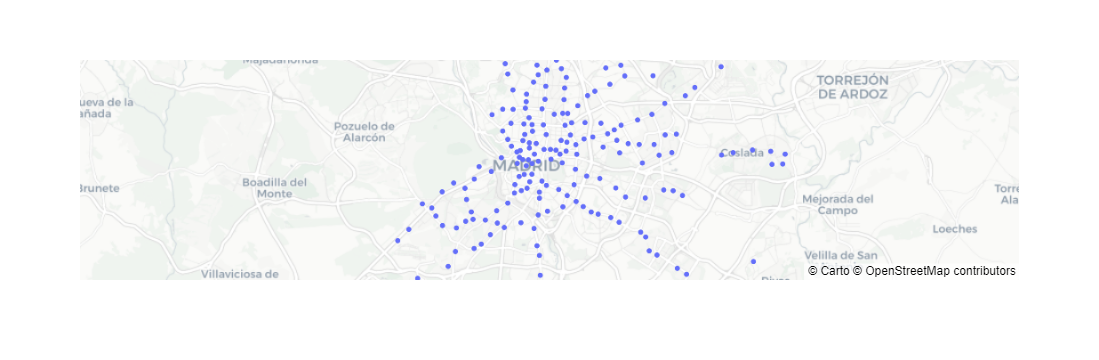

In [7]:
# Mapa de Puntos
# https://plotly.com/python/scattermapbox/
# https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html

fig = px.scatter_mapbox(
    estaciones,
    lat = 'latitude',
    lon = 'longitude',
    mapbox_style = 'carto-positron',
    zoom = 10
)

fig.show()

In [8]:
estaciones = estaciones.reset_index()
estaciones

DENOMINACION   latitude  longitude  ENCUESTADOMICILIARIA  \
0                 ABRANTES  40.380834  -3.727900                   296   
1                  ACACIAS  40.403872  -3.706641                    28   
2      AEROPUERTO T1 T2 T3  40.468644  -3.569538                   585   
3            AEROPUERTO T4  40.491767  -3.593246                   585   
4         ALAMEDA DE OSUNA  40.457789  -3.587521                   581   
..                     ...        ...        ...                   ...   
236      VILLA DE VALLECAS  40.379599  -3.621296                   500   
237        VILLAVERDE ALTO  40.341229  -3.711990                   484   
238  VILLAVERDE BAJO CRUCE  40.350895  -3.692649                   481   
239              VINATEROS  40.410240  -3.652734                   380   
240           VISTA ALEGRE  40.388847  -3.739825                   289   

    GRADOACCESIBILIDAD  
0                    T  
1                    N  
2                    T  
3                    T  
4                    T  
..                 ...  
236                  T  
237                  T  
238                  T  
239                  N  
240                  N  

[241 rows x 5 columns]

In [9]:
# Mapa de Puntos
# https://plotly.com/python/scattermapbox/
# https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html

fig = px.scatter_mapbox(
    estaciones, 
    lat="latitude", 
    lon="longitude",     
    mapbox_style="carto-positron", 
    zoom=10,
    hover_name="DENOMINACION",
    text='GRADOACCESIBILIDAD',
    color="ENCUESTADOMICILIARIA", 
    color_continuous_scale='matter',
)
fig.update_traces(
    marker=dict(
        size=10,
    )
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [29]:
# Mapa de Burbujas
# https://plotly.com/python/scattermapbox/
# https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html

fig = px.scatter_mapbox(
    estaciones, 
    lat="latitude", 
    lon="longitude",     
    color="GRADOACCESIBILIDAD", 
    size="ENCUESTADOMICILIARIA",
    size_max=20, 
    mapbox_style="carto-positron", 
    zoom=10,
    text='GRADOACCESIBILIDAD'
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()